<a href="https://colab.research.google.com/github/Aomaphisara/ULckdresearch2023/blob/main/XGBoost_Feature_Importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

อ้างอิง : https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

ในตัวอย่างใช้ XGBClassifier (จัดหมวดหมู่) แต่งานเราเป็น regression  เลยใช้ XGBRegressor

https://www.youtube.com/watch?v=zAMXtg0gSsk

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/ckdresearch2023/Assign/Assign 6: MissingValue/MissForest.xlsx')

In [6]:
from xgboost import XGBRegressor # regression
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [8]:
df.columns

Index(['Unnamed: 0', 'PatientUID', 'PatientVisitUID', 'Slopes', 'InPatient',
       'OutPatient', 'Emergency', 'Recent_Date', 'VisitLocation', 'StartDTTM',
       'EndDttm', 'LabCwhen', 'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
       'Sex', 'Age', 'NATNL', 'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Hear

#Slope

In [9]:
#เพิ่ม slope,L1-eGFR เพื่อใช้เป็นตัวเเปร y ในการทำนายหา feature impotant
selected_columns = ['Slopes', 'L1-eGFR','InPatient',
       'OutPatient', 'Emergency', 'Sex', 'Age', 'NATNL', 'VisitLocation',
       'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
      'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio']
df = df[selected_columns]
df.head()

,Slopes,L1-eGFR,InPatient,OutPatient,Emergency,Sex,Age,NATNL,VisitLocation,G1M2-ARB,...,L13-Hematocrit,L14-WBC,L15-Platelet,L19-Blood-sugar,L20-HbA1c,L21-Cholesterol,L22-Triglyceride,L23-LDL-Cholesterol,L24-HDL-Cholesterol,L28-UrineProtein-Cr-ratio
0,-7.158596,71.70,0,1,0,1,73,0,เวชปฏิบัติทั่วไป (OPD)-D03,90,...,41.678,4.9104,195.63,91.0,5.400,215.0,81.0,123.0,99.0,57.671
1,5.550691,63.60,0,1,0,1,74,0,เวชปฏิบัติทั่วไป (OPD)-D03,90,...,41.409,5.6073,267.72,86.0,5.567,219.0,64.0,146.0,73.0,146.106
2,-6.063710,70.20,0,1,0,1,75,0,เวชปฏิบัติทั่วไป (OPD)-D03,100,...,32.400,9.4100,313.00,100.0,5.300,193.0,62.0,129.0,65.0,50.831
3,-12.812245,64.02,0,1,0,1,76,0,เวชปฏิบัติทั่วไป (OPD)-D03,35,...,41.351,5.2678,199.66,89.0,5.292,205.0,69.0,139.0,76.0,121.937
4,28.287500,48.54,0,1,0,1,78,0,เวชปฏิบัติทั่วไป (OPD)-D03,100,...,34.600,5.4200,434.00,88.0,5.500,198.0,74.0,129.0,60.0,41.564


<Axes: >

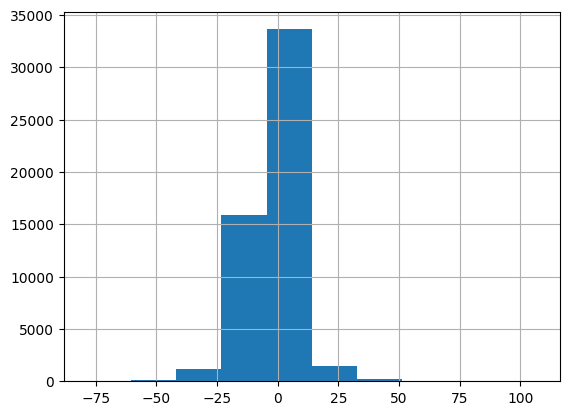

In [11]:
df['Slopes'].hist()

In [13]:
#selected values
X=df[['InPatient',
       'OutPatient', 'Emergency', 'Sex', 'Age', 'NATNL',
       'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
      'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio' ]]
y=df['Slopes']

In [14]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape,  X_test.shape

((42096, 71), (10524, 71))

In [16]:
# fit model no training data
model = XGBRegressor()  # Use XGBRegressor for regression tasks
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [17]:
# Getting feature importance
feature_importance = model.feature_importances_

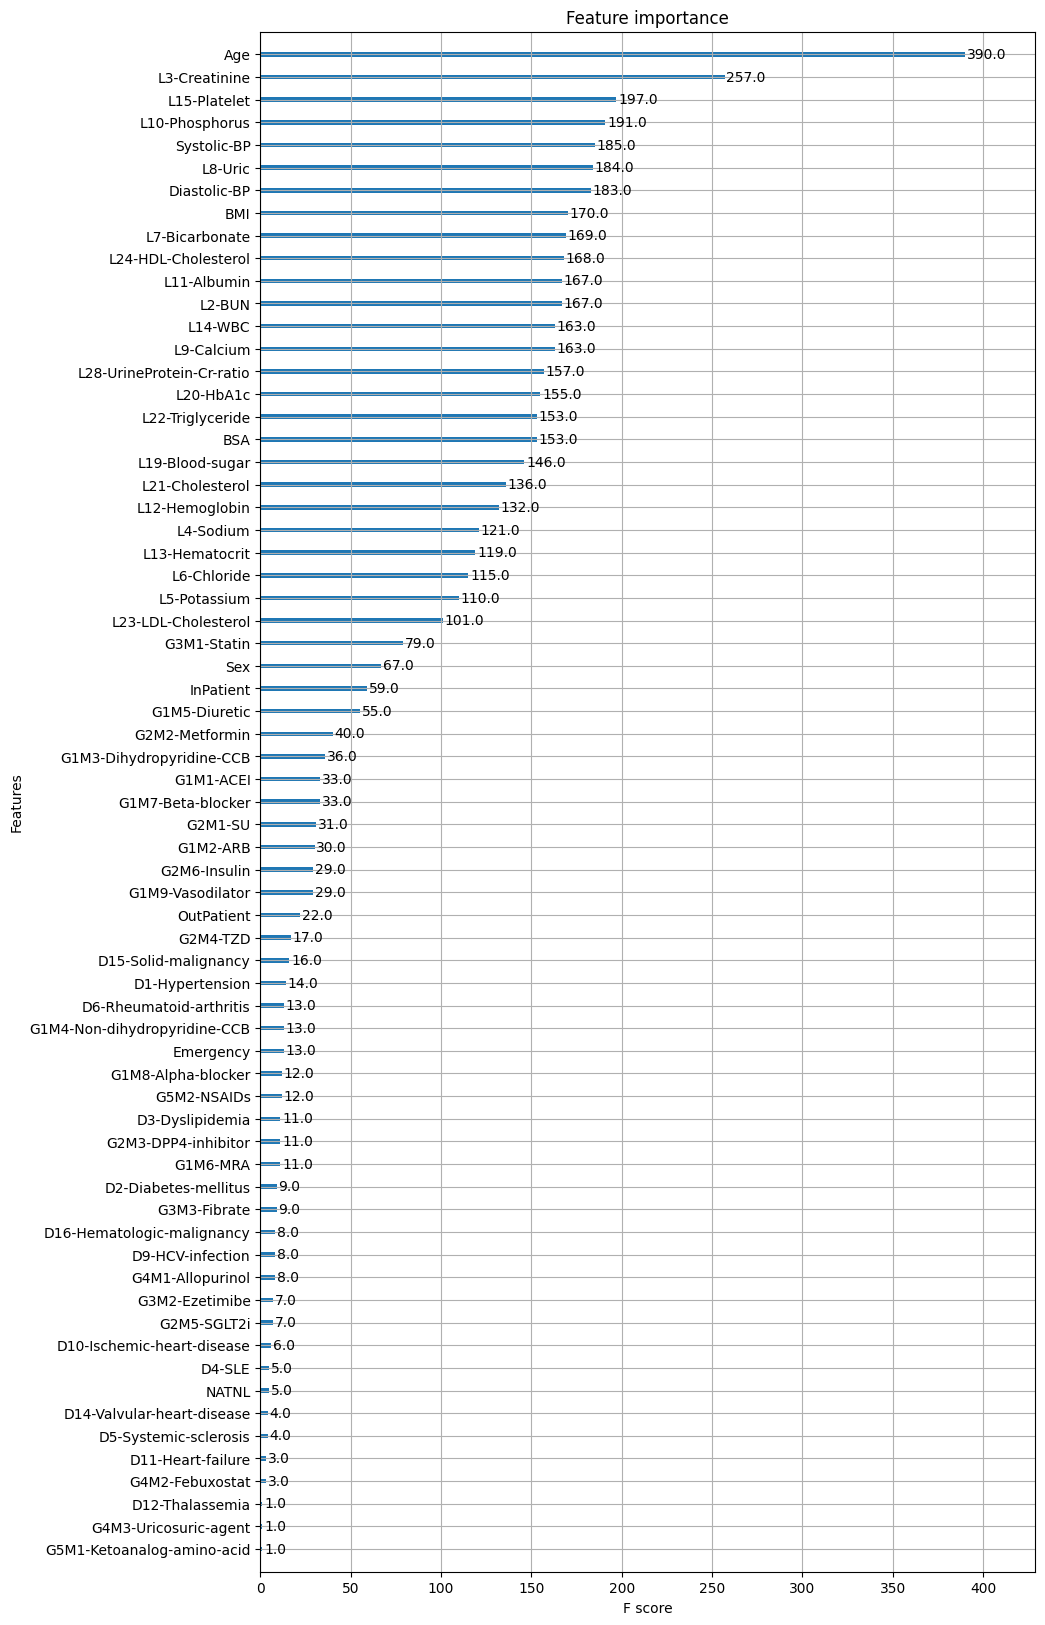

In [18]:
# plot feature importance
plot_importance(model)
pyplot.gcf().set_size_inches(10, 20)
pyplot.show()


Training MSE

In [22]:
pred_train = model.predict(X_train)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score # use function score RMSE

In [24]:
print(r2_score(y_train, pred_train)) # how much variance the model explains?

0.551262262002232


In [25]:
print(mean_squared_error(y_train, pred_train))

43.05800060289799


Testing MSE

In [26]:
predictions = model.predict(X_test)

In [27]:
model.score(X_test, y_test)

0.17646689852440856

In [28]:
print(r2_score(y_test, predictions))

0.17646689852440856


In [29]:
print(mean_squared_error(y_test, predictions))

78.19970126895588


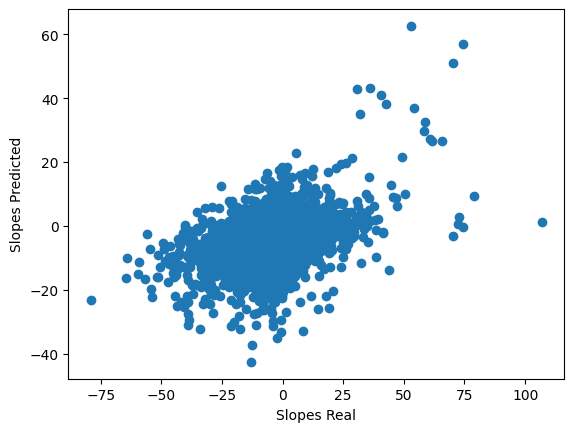

In [30]:
pyplot.scatter(y_test, predictions)
pyplot.xlabel("Slopes Real")
pyplot.ylabel("Slopes Predicted")
pyplot.show()

**Feature Selection with XGBoost Feature Importance Scores**

ตามตัวอย่างที่อ้างอิงใช้ค่า Accuracy ในการทดสอบความแม่นยำในการเลือกตัดสินใจว่าในการเลือกจำนวน Featureซึ่งเป็นตัวอย่างในการทำ Classifier ส่วนงานเราเป็นการทำRegressor ทีใช้ค่า คือค่า MSE ในการทดสอบ ซึ่งผลที่ได้มันสูงมากๆเลยยังไม่แน่ใจเกี่ยวกับโค้ดและวิธีการทำ กำลังหาวิธีการและตัวอย่างอื่นที่เค้าใช้เลือกตัวแปรที่สำคัญคัญเพิ่มเติม

In [ ]:
# Import necessary libraries
from numpy import sort
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error, r2_score

# Define custom class to fix bug in xgboost 1.0.2
class MyXGBRegressor(XGBRegressor):
    @property
    def coef_(self):
        return self.feature_importances_

# split data into X and y
X=df[['InPatient',
       'OutPatient', 'Emergency', 'Sex', 'Age', 'NATNL',
       'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
      'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L2-BUN', 'L3-Creatinine',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio' ]]
y=df['Slopes']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

# Fit model on all training data
model = MyXGBRegressor()
model.fit(X_train, y_train)

# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # Select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)

    # Train model
    selection_model = MyXGBRegressor()  # Use your custom class
    selection_model.fit(select_X_train, y_train)

    # Evaluate model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)  # Calculate RMSE
    mae = mean_absolute_error(y_test, predictions)  # Calculate MAE
    r_squared = r2_score(y_test, predictions)  # Calculate R-squared score

    # Print the metrics
    print("Thresh=%.3f, n=%d, MSE: %.2f, RMSE: %.2f, MAE: %.2f, R-squared: %.2f" % (thresh, select_X_train.shape[1], mse, rmse, mae, r_squared))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=71, MSE: 80.21, RMSE: 8.96, MAE: 6.19, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=71, MSE: 80.21, RMSE: 8.96, MAE: 6.19, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.001, n=69, MSE: 80.21, RMSE: 8.96, MAE: 6.19, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.003, n=68, MSE: 80.21, RMSE: 8.96, MAE: 6.19, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.004, n=67, MSE: 79.82, RMSE: 8.93, MAE: 6.18, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.005, n=66, MSE: 80.39, RMSE: 8.97, MAE: 6.20, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.006, n=65, MSE: 80.53, RMSE: 8.97, MAE: 6.20, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.006, n=64, MSE: 80.35, RMSE: 8.96, MAE: 6.20, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.006, n=63, MSE: 80.27, RMSE: 8.96, MAE: 6.18, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=62, MSE: 80.41, RMSE: 8.97, MAE: 6.20, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=61, MSE: 79.56, RMSE: 8.92, MAE: 6.18, R-squared: 0.17


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=60, MSE: 80.95, RMSE: 9.00, MAE: 6.21, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=59, MSE: 80.34, RMSE: 8.96, MAE: 6.20, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=58, MSE: 80.81, RMSE: 8.99, MAE: 6.21, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=57, MSE: 80.81, RMSE: 8.99, MAE: 6.21, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=56, MSE: 80.50, RMSE: 8.97, MAE: 6.21, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=55, MSE: 80.51, RMSE: 8.97, MAE: 6.19, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=54, MSE: 80.24, RMSE: 8.96, MAE: 6.19, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=53, MSE: 79.89, RMSE: 8.94, MAE: 6.17, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=52, MSE: 79.73, RMSE: 8.93, MAE: 6.16, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=51, MSE: 80.55, RMSE: 8.98, MAE: 6.19, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=50, MSE: 80.68, RMSE: 8.98, MAE: 6.21, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=49, MSE: 80.10, RMSE: 8.95, MAE: 6.18, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=48, MSE: 80.05, RMSE: 8.95, MAE: 6.19, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=47, MSE: 80.12, RMSE: 8.95, MAE: 6.18, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=46, MSE: 80.64, RMSE: 8.98, MAE: 6.21, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.011, n=45, MSE: 79.95, RMSE: 8.94, MAE: 6.19, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.011, n=44, MSE: 81.09, RMSE: 9.00, MAE: 6.23, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.011, n=43, MSE: 80.05, RMSE: 8.95, MAE: 6.20, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.011, n=42, MSE: 80.50, RMSE: 8.97, MAE: 6.22, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.011, n=41, MSE: 80.75, RMSE: 8.99, MAE: 6.21, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.011, n=40, MSE: 80.23, RMSE: 8.96, MAE: 6.20, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.011, n=39, MSE: 81.23, RMSE: 9.01, MAE: 6.22, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.012, n=38, MSE: 80.36, RMSE: 8.96, MAE: 6.20, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.012, n=37, MSE: 80.40, RMSE: 8.97, MAE: 6.22, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.012, n=36, MSE: 80.44, RMSE: 8.97, MAE: 6.20, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.012, n=35, MSE: 80.86, RMSE: 8.99, MAE: 6.20, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.012, n=34, MSE: 80.07, RMSE: 8.95, MAE: 6.19, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=33, MSE: 80.50, RMSE: 8.97, MAE: 6.20, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=32, MSE: 80.43, RMSE: 8.97, MAE: 6.20, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=31, MSE: 80.77, RMSE: 8.99, MAE: 6.21, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=30, MSE: 80.99, RMSE: 9.00, MAE: 6.22, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=29, MSE: 80.32, RMSE: 8.96, MAE: 6.20, R-squared: 0.16


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=28, MSE: 80.96, RMSE: 9.00, MAE: 6.20, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=27, MSE: 80.62, RMSE: 8.98, MAE: 6.22, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=26, MSE: 81.18, RMSE: 9.01, MAE: 6.21, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=25, MSE: 81.18, RMSE: 9.01, MAE: 6.21, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=24, MSE: 81.00, RMSE: 9.00, MAE: 6.21, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=23, MSE: 81.95, RMSE: 9.05, MAE: 6.24, R-squared: 0.14


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=22, MSE: 80.71, RMSE: 8.98, MAE: 6.20, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=21, MSE: 81.61, RMSE: 9.03, MAE: 6.22, R-squared: 0.14


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=20, MSE: 82.14, RMSE: 9.06, MAE: 6.24, R-squared: 0.14


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.016, n=19, MSE: 81.01, RMSE: 9.00, MAE: 6.21, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.016, n=18, MSE: 81.27, RMSE: 9.01, MAE: 6.22, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.016, n=17, MSE: 81.76, RMSE: 9.04, MAE: 6.22, R-squared: 0.14


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.016, n=16, MSE: 81.23, RMSE: 9.01, MAE: 6.21, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.016, n=15, MSE: 81.71, RMSE: 9.04, MAE: 6.23, R-squared: 0.14


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.018, n=14, MSE: 81.76, RMSE: 9.04, MAE: 6.20, R-squared: 0.14


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.018, n=13, MSE: 82.09, RMSE: 9.06, MAE: 6.23, R-squared: 0.14


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.018, n=12, MSE: 81.56, RMSE: 9.03, MAE: 6.23, R-squared: 0.14


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.018, n=11, MSE: 82.78, RMSE: 9.10, MAE: 6.25, R-squared: 0.13


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.018, n=10, MSE: 82.12, RMSE: 9.06, MAE: 6.23, R-squared: 0.14


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.019, n=9, MSE: 81.93, RMSE: 9.05, MAE: 6.22, R-squared: 0.14


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.020, n=8, MSE: 82.39, RMSE: 9.08, MAE: 6.22, R-squared: 0.14


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.021, n=7, MSE: 83.72, RMSE: 9.15, MAE: 6.23, R-squared: 0.12


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.022, n=6, MSE: 81.70, RMSE: 9.04, MAE: 6.21, R-squared: 0.14


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.024, n=5, MSE: 81.38, RMSE: 9.02, MAE: 6.20, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.026, n=4, MSE: 81.23, RMSE: 9.01, MAE: 6.20, R-squared: 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.044, n=3, MSE: 81.52, RMSE: 9.03, MAE: 6.19, R-squared: 0.14


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.051, n=2, MSE: 81.70, RMSE: 9.04, MAE: 6.15, R-squared: 0.14
Thresh=0.095, n=1, MSE: 85.30, RMSE: 9.24, MAE: 6.30, R-squared: 0.11


# eGFR

<Axes: >

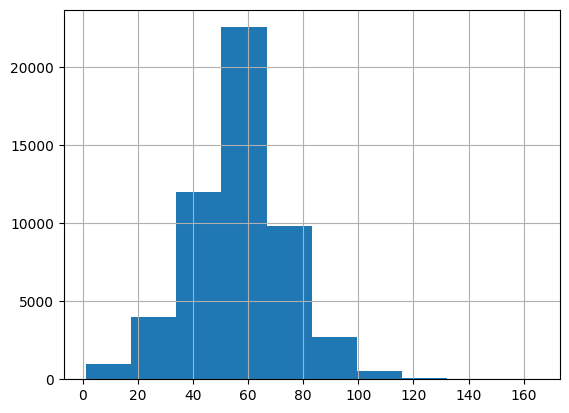

In [31]:
df['L1-eGFR'].hist()

In [32]:
x=df[['InPatient',
       'OutPatient', 'Emergency', 'Sex', 'Age', 'NATNL',
       'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
      'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L2-BUN',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio' ]]
y=df['L1-eGFR']

In [33]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
x_train.shape,  x_test.shape

((42096, 70), (10524, 70))

In [35]:
# fit model no training data
xgb = XGBRegressor()  # Use XGBRegressor for regression tasks
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
# Getting feature importance
feature_importance_egfr = xgb.feature_importances_

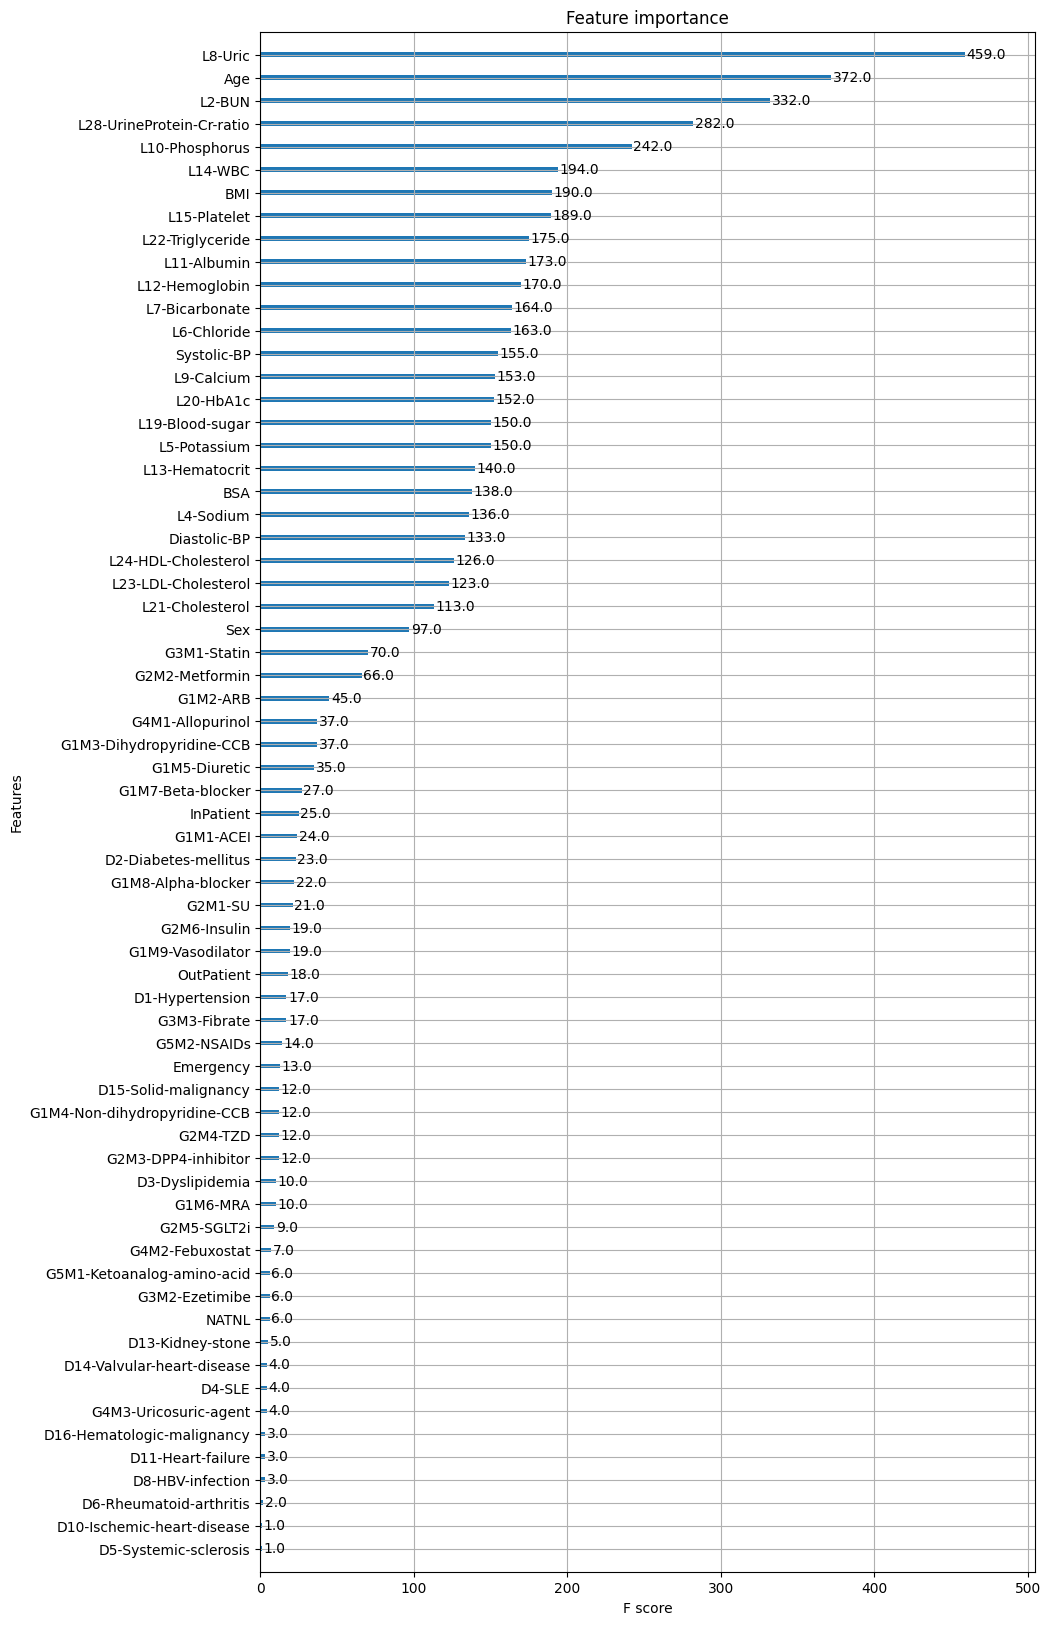

In [37]:
# plot feature importance
plot_importance(xgb)
pyplot.gcf().set_size_inches(10, 20)
pyplot.show()

Training MSE

In [38]:
pred_train = xgb.predict(x_train)

In [39]:
from sklearn.metrics import mean_squared_error, r2_score # use function score RMSE

In [40]:
print(r2_score(y_train, pred_train)) # how much variance the model explains?

0.8396142282151147


In [41]:
print(mean_squared_error(y_train, pred_train))

48.391294231197946


Testing MSE

In [43]:
predictions = xgb.predict(x_test)

In [44]:
xgb.score(x_test, y_test)

0.7013913096028128

In [45]:
print(r2_score(y_test, predictions))

0.7013913096028128


In [46]:
print(mean_squared_error(y_test, predictions))

90.14035758357372


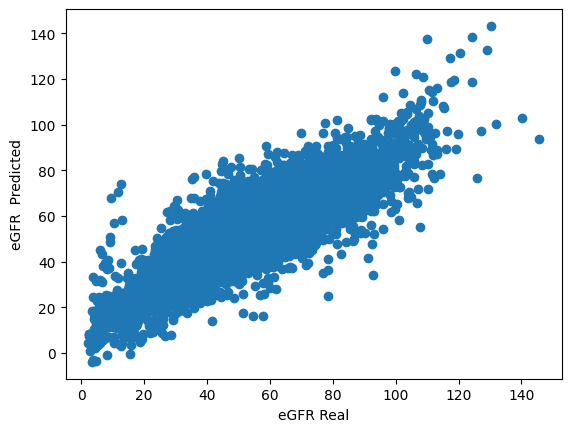

In [47]:
pyplot.scatter(y_test, predictions)
pyplot.xlabel("eGFR Real")
pyplot.ylabel("eGFR  Predicted")
pyplot.show()

In [51]:
# Import necessary libraries
from numpy import sort
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define custom class to fix bug in xgboost 1.0.2
class MyXGBRegressor(XGBRegressor):
    @property
    def coef_(self):
        return self.feature_importances_
# split data into X and y
x =df[['InPatient',
       'OutPatient', 'Emergency', 'Sex', 'Age', 'NATNL',
       'G1M2-ARB', 'G3M1-Statin', 'G5M2-NSAIDs',
       'G1M5-Diuretic', 'G1M7-Beta-blocker', 'G1M3-Dihydropyridine-CCB',
       'G1M6-MRA', 'G1M1-ACEI', 'G2M2-Metformin', 'G2M3-DPP4-inhibitor',
       'G2M1-SU', 'G3M3-Fibrate', 'G2M5-SGLT2i', 'G4M1-Allopurinol',
       'G1M9-Vasodilator', 'G1M8-Alpha-blocker', 'G2M6-Insulin', 'G2M4-TZD',
       'G4M2-Febuxostat', 'G3M2-Ezetimibe', 'G1M4-Non-dihydropyridine-CCB',
       'G5M1-Ketoanalog-amino-acid', 'G2M7-GLP1-RA', 'G4M3-Uricosuric-agent',
      'BMI', 'BSA', 'Diastolic-BP', 'Systolic-BP',
       'D1-Hypertension', 'D2-Diabetes-mellitus', 'D3-Dyslipidemia', 'D4-SLE',
       'D5-Systemic-sclerosis', 'D6-Rheumatoid-arthritis', 'D7-HIV-infection',
       'D8-HBV-infection', 'D9-HCV-infection', 'D10-Ischemic-heart-disease',
       'D11-Heart-failure', 'D12-Thalassemia', 'D13-Kidney-stone',
       'D14-Valvular-heart-disease', 'D15-Solid-malignancy',
       'D16-Hematologic-malignancy', 'L2-BUN',
       'L4-Sodium', 'L5-Potassium', 'L6-Chloride', 'L7-Bicarbonate', 'L8-Uric',
       'L9-Calcium', 'L10-Phosphorus', 'L11-Albumin', 'L12-Hemoglobin',
       'L13-Hematocrit', 'L14-WBC', 'L15-Platelet', 'L19-Blood-sugar',
       'L20-HbA1c', 'L21-Cholesterol', 'L22-Triglyceride',
       'L23-LDL-Cholesterol', 'L24-HDL-Cholesterol',
       'L28-UrineProtein-Cr-ratio' ]]
y=df['L1-eGFR']

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)

# Fit model on all training data
xgb = MyXGBRegressor()
xgb.fit(x_train, y_train)

# Fit model using each importance as a threshold
thresholds = sort(xgb.feature_importances_)
for thresh in thresholds:
    # Select features using threshold
    selection = SelectFromModel(xgb, threshold=thresh, prefit=True)
    select_x_train = selection.transform(x_train)

    # Train model
    selection_model = MyXGBRegressor()  # Use your custom class
    selection_model.fit(select_x_train, y_train)

    # Evaluate model
    select_x_test = selection.transform(x_test)
    predictions = selection_model.predict(select_x_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)  # Calculate RMSE
    mae = mean_absolute_error(y_test, predictions)  # Calculate MAE
    r_squared = r2_score(y_test, predictions)  # Calculate R-squared score

    # Print the metrics
    print("Thresh=%.3f, n=%d, MSE: %.2f, RMSE: %.2f, MAE: %.2f, R-squared: %.2f" % (thresh, select_x_train.shape[1], mse, rmse, mae, r_squared))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=70, MSE: 89.53, RMSE: 9.46, MAE: 7.09, R-squared: 0.71


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=70, MSE: 89.53, RMSE: 9.46, MAE: 7.09, R-squared: 0.71


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=70, MSE: 89.53, RMSE: 9.46, MAE: 7.09, R-squared: 0.71


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=70, MSE: 89.53, RMSE: 9.46, MAE: 7.09, R-squared: 0.71


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.004, n=66, MSE: 89.53, RMSE: 9.46, MAE: 7.09, R-squared: 0.71


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.004, n=65, MSE: 90.59, RMSE: 9.52, MAE: 7.13, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.004, n=64, MSE: 90.30, RMSE: 9.50, MAE: 7.12, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.005, n=63, MSE: 90.51, RMSE: 9.51, MAE: 7.12, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.005, n=62, MSE: 89.97, RMSE: 9.49, MAE: 7.09, R-squared: 0.71


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.005, n=61, MSE: 90.01, RMSE: 9.49, MAE: 7.13, R-squared: 0.71


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.005, n=60, MSE: 90.28, RMSE: 9.50, MAE: 7.14, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.005, n=59, MSE: 90.32, RMSE: 9.50, MAE: 7.11, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.005, n=58, MSE: 90.60, RMSE: 9.52, MAE: 7.14, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.005, n=57, MSE: 90.62, RMSE: 9.52, MAE: 7.14, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.005, n=56, MSE: 89.84, RMSE: 9.48, MAE: 7.12, R-squared: 0.71


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.005, n=55, MSE: 90.35, RMSE: 9.51, MAE: 7.14, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.006, n=54, MSE: 90.50, RMSE: 9.51, MAE: 7.12, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.006, n=53, MSE: 90.47, RMSE: 9.51, MAE: 7.15, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.006, n=52, MSE: 90.97, RMSE: 9.54, MAE: 7.18, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.006, n=51, MSE: 90.53, RMSE: 9.51, MAE: 7.16, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.006, n=50, MSE: 90.89, RMSE: 9.53, MAE: 7.16, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.006, n=49, MSE: 89.85, RMSE: 9.48, MAE: 7.11, R-squared: 0.71


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.006, n=48, MSE: 90.29, RMSE: 9.50, MAE: 7.14, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.006, n=47, MSE: 90.22, RMSE: 9.50, MAE: 7.14, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.006, n=46, MSE: 89.76, RMSE: 9.47, MAE: 7.11, R-squared: 0.71


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=45, MSE: 90.33, RMSE: 9.50, MAE: 7.14, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=44, MSE: 90.05, RMSE: 9.49, MAE: 7.13, R-squared: 0.71


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=43, MSE: 89.94, RMSE: 9.48, MAE: 7.13, R-squared: 0.71


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=42, MSE: 91.26, RMSE: 9.55, MAE: 7.16, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=41, MSE: 90.89, RMSE: 9.53, MAE: 7.13, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.007, n=40, MSE: 91.15, RMSE: 9.55, MAE: 7.17, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=39, MSE: 90.74, RMSE: 9.53, MAE: 7.16, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=38, MSE: 91.35, RMSE: 9.56, MAE: 7.18, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=37, MSE: 92.44, RMSE: 9.61, MAE: 7.23, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=36, MSE: 91.64, RMSE: 9.57, MAE: 7.20, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=35, MSE: 91.81, RMSE: 9.58, MAE: 7.21, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=34, MSE: 91.52, RMSE: 9.57, MAE: 7.21, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=33, MSE: 91.84, RMSE: 9.58, MAE: 7.21, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=32, MSE: 91.45, RMSE: 9.56, MAE: 7.20, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=31, MSE: 92.21, RMSE: 9.60, MAE: 7.23, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=30, MSE: 92.16, RMSE: 9.60, MAE: 7.22, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=29, MSE: 92.27, RMSE: 9.61, MAE: 7.23, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.009, n=28, MSE: 92.66, RMSE: 9.63, MAE: 7.24, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=27, MSE: 92.15, RMSE: 9.60, MAE: 7.22, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=26, MSE: 92.75, RMSE: 9.63, MAE: 7.22, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=25, MSE: 93.65, RMSE: 9.68, MAE: 7.28, R-squared: 0.69


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.011, n=24, MSE: 92.93, RMSE: 9.64, MAE: 7.26, R-squared: 0.70


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.012, n=23, MSE: 93.38, RMSE: 9.66, MAE: 7.27, R-squared: 0.69


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.012, n=22, MSE: 93.98, RMSE: 9.69, MAE: 7.30, R-squared: 0.69


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.012, n=21, MSE: 93.49, RMSE: 9.67, MAE: 7.27, R-squared: 0.69


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=20, MSE: 95.16, RMSE: 9.75, MAE: 7.32, R-squared: 0.69


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=19, MSE: 95.89, RMSE: 9.79, MAE: 7.34, R-squared: 0.69


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=18, MSE: 95.14, RMSE: 9.75, MAE: 7.32, R-squared: 0.69


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=17, MSE: 100.16, RMSE: 10.01, MAE: 7.53, R-squared: 0.67


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=16, MSE: 102.58, RMSE: 10.13, MAE: 7.62, R-squared: 0.66


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.015, n=15, MSE: 103.53, RMSE: 10.17, MAE: 7.66, R-squared: 0.66


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.016, n=14, MSE: 102.59, RMSE: 10.13, MAE: 7.63, R-squared: 0.66


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.017, n=13, MSE: 104.42, RMSE: 10.22, MAE: 7.69, R-squared: 0.66


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.017, n=12, MSE: 105.32, RMSE: 10.26, MAE: 7.71, R-squared: 0.66


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.018, n=11, MSE: 104.04, RMSE: 10.20, MAE: 7.70, R-squared: 0.66


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.019, n=10, MSE: 105.06, RMSE: 10.25, MAE: 7.72, R-squared: 0.66


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.020, n=9, MSE: 107.39, RMSE: 10.36, MAE: 7.82, R-squared: 0.65


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.021, n=8, MSE: 109.35, RMSE: 10.46, MAE: 7.88, R-squared: 0.64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.025, n=7, MSE: 114.30, RMSE: 10.69, MAE: 8.09, R-squared: 0.63


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.030, n=6, MSE: 115.28, RMSE: 10.74, MAE: 8.13, R-squared: 0.62


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.030, n=5, MSE: 127.88, RMSE: 11.31, MAE: 8.57, R-squared: 0.58


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.039, n=4, MSE: 131.99, RMSE: 11.49, MAE: 8.72, R-squared: 0.57


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.040, n=3, MSE: 133.27, RMSE: 11.54, MAE: 8.74, R-squared: 0.56


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.060, n=2, MSE: 151.38, RMSE: 12.30, MAE: 9.29, R-squared: 0.50
Thresh=0.234, n=1, MSE: 168.18, RMSE: 12.97, MAE: 9.78, R-squared: 0.45


**Feature Selection with XGBoost Feature Importance Scores**

*   กรณีที่ไม่ตัด L3-Creatinine :
ในการเลือกของค่า eGFR ถ้าเลือกที่จำนวน 3 feature ที่ Thresh=0.060 จะให้ค่า  MSE: 1.22, RMSE: 1.11, MAE: 0.58 ซึ่งมีค่าน้อยที่สุด และ R-squared: 1.00 (เข้าใกล้ 1) ดังนั้นจำนวนที่เลือก คือ 3 feature ได้แก่  L3-Creatinine, Age, Sex โดยดูจากกราฟที่ Feature Importance ซึ่งเรียงลำดับตามความสำคัญ

*   กรณี่ตัด L3-Creatinine
MSE ที่มีค่าน้อยที่สุดเท่ากับ 89.53 และค่า R-squared เท่ากับ 0.71 มีจำนวนฟีเจอร์ n=70 (ทั้งหมด)


